<a href="https://colab.research.google.com/github/Pavalya-Periyasamy05/Machine-Learning-and-AI/blob/main/Compute_Lipinski_Descriptor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Computational Drug Discovery: Computing Molecular descriptors**

##  **Install conda and rdkit**

In [1]:
# 1. Install condacolab to bridge Conda and Google Colab
!pip install -q condacolab
import condacolab
condacolab.install()


⏬ Downloading https://github.com/jaimergp/miniforge/releases/download/24.11.2-1_colab/Miniforge3-colab-24.11.2-1_colab-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:12
🔁 Restarting kernel...


In [ ]:
import condacolab
condacolab.check()

# Install RDKit
!conda install -c conda-forge rdkit -y

In [2]:
import sys
# Manually add the Conda path to your system path
conda_path = "/usr/local/lib/python3.11/site-packages"
if conda_path not in sys.path:
    sys.path.append(conda_path)

import rdkit
print(f"Success! RDKit version: {rdkit.__version__}")


#from rdkit import Chem
#from rdkit.Chem import Draw
# Test again
#mol = Chem.MolFromSmiles('CC(=O)OC1=CC=CC=C1C(=O)O')
#print(f"Success! RDKit version: {rdkit.__version__}")
#Draw.MolToImage(mol)

Success! RDKit version: 2025.09.4


## **Load bioactivity data**

In [3]:
import pandas as pd

In [5]:
df =pd.read_csv("bioactivity_preprocessed_data.csv")
df

,molecule_chembl_id,canonical_smiles,standard_value,bioactivity_class
0,CHEMBL2396992,Cc1[nH]c2cc(Cl)cc(Cl)c2c1CCN,155000.0,inactive
1,CHEMBL3218635,CC(C)[C@@H]1NC(=O)[C@@H](CC(N)=O)NC(=O)[C@H](C...,1200.0,intermediate
2,CHEMBL3218636,CCCC[C@H]1NC(=O)[C@@H](Cc2ccc3ccccc3c2)NC(=O)[...,10000.0,inactive
3,CHEMBL3218637,CC1(C)COC(=O)[C@H](Cc2ccccc2)NC(=O)[C@H](CCCNC...,1800.0,intermediate
4,CHEMBL3218638,CC(C)C[C@@H]1NC(=O)[C@H](CCCNC(=N)N)NC(=O)[C@H...,200.0,active
...,...,...,...,...
2746,CHEMBL5807729,C=CC(=O)N1CC2(CC(n3nc(-c4cccnc4C)c(-c4c(Cl)ccc...,2300.0,intermediate
2747,CHEMBL6033395,C=CC(=O)N1CC2(CC(n3nc(-c4cnc(OC)nc4)c(-c4c(Cl)...,3500.0,intermediate
2748,CHEMBL5768373,C=CC(=O)N1CC2(CC(n3nc(-c4cccc(=O)n4C)c(-c4c(Cl...,5300.0,intermediate
2749,CHEMBL6000934,C=CC(=O)N1CC2(CC(n3nc(-c4cc(C)nn4CCN(C)C)c(-c4...,1400.0,intermediate


In [7]:
# Select the first 5 rows and only the relevant columns
first5 = df[['canonical_smiles', 'molecule_chembl_id']].head(5)

# Write to a text file with space-separated values
with open("first5_smiles_chembl.txt", "w") as f:
    for index, row in first5.iterrows():
        f.write(f"{row['canonical_smiles']} {row['molecule_chembl_id']}\n")

print("First 5 SMILES and ChEMBL IDs saved to first5_smiles_chembl.txt (space-separated).")

First 5 SMILES and ChEMBL IDs saved to first5_smiles_chembl.txt (space-separated).


## **Calculate Lipinski descriptors**

### Christopher Lipinski, a scientist at Pfizer came up with set of  rule-of-thumb for evaluating the druglikeness of compounds. Such druglikeness is based on the key pharmacokinetic properties comprising of Absorption, Distribution, Metabolism and Excretion (ADME) that is also known as pharmacokinetic profile. ADME tell us the relative druglikeness of the compound whether it can be absorbed into the body or distributed into the proper tissue and organs, become metabolized and eventually become excreted from the body and so in order to derive rule of 5, Christopher Lipinski collected a set of FDA approved drug that are normally admistered orally and based on his analysis , he observed that the 4 descriptors that was used for his analysis had corresponding values in multiples of 5 as follows

### The Lipinski's Rule stated the following:

### 1. molecular weight < 500 Dalton
### 2. Octanol-water partition coefficient(LogP) < 5 (Balance between water and fat solubility)
### 3. Hydrogen bond donors < 5
### 4. Hydrogen bond acceptor < 10

## **Import libraries**

In [ ]:
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

## **Compute descriptors**

In [ ]:
# custom function isnpired by: https://codeocean.com/explore/capsules?query=tag:data-curation

def lipinski(smiles, verbose=False):

  moldata = []
  for elem in smiles:
    mol = Chem.MolFromSmiles(elem)
    moldata.append(mol)

  baseData = np.arange(1,1)
  i=0
  for mol in moldata:

    desc_MolWt = Descriptors.MolWt(mol)
    desc_MolLogP = Descriptors.MolLogP(mol)
    desc_NumHDonors =Lipinski.NumHDonors(mol)
    desc_NumHAcceptors =Lipinski.NumHAcceptors(mol)

    row = np.array([desc_MolWt,
                    desc_MolLogP,
                    desc_NumHDonors,
                    desc_NumHAcceptors])

    if(i==0):
      baseData=row
    else:
      baseData=np.vstack([baseData, row])
    i=i+1
  columnNames=["MW","LogP", "NumHDonors","NumHAcceptors"]
  descriptors = pd.DataFrame(data=baseData, columns=columnNames)

  return descriptors


In [ ]:
df_lipinski = lipinski(df.canonical_smiles)

## **Combine DataFrames**

### Look at the 2 DataFrames that will be combined
### We need standard value and bioactivity class from df dataframe to combine with lipinski dataframe which has got molecular descriptors information

In [ ]:
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,243.137,3.28432,2.0,1.0
1,1396.591,-1.92556,17.0,17.0
2,1499.798,4.44247,13.0,15.0
3,1377.612,0.90687,14.0,16.0
4,1452.703,-1.14759,19.0,17.0
...,...,...,...,...
2746,472.980,5.10814,1.0,5.0
2747,489.967,4.20332,1.0,7.0
2748,488.979,4.10342,1.0,6.0
2749,547.107,4.77966,1.0,7.0


In [ ]:
df

,molecule_chembl_id,canonical_smiles,standard_value,bioactivity_class
0,CHEMBL2396992,Cc1[nH]c2cc(Cl)cc(Cl)c2c1CCN,155000.0,inactive
1,CHEMBL3218635,CC(C)[C@@H]1NC(=O)[C@@H](CC(N)=O)NC(=O)[C@H](C...,1200.0,intermediate
2,CHEMBL3218636,CCCC[C@H]1NC(=O)[C@@H](Cc2ccc3ccccc3c2)NC(=O)[...,10000.0,inactive
3,CHEMBL3218637,CC1(C)COC(=O)[C@H](Cc2ccccc2)NC(=O)[C@H](CCCNC...,1800.0,intermediate
4,CHEMBL3218638,CC(C)C[C@@H]1NC(=O)[C@H](CCCNC(=N)N)NC(=O)[C@H...,200.0,active
...,...,...,...,...
2746,CHEMBL5807729,C=CC(=O)N1CC2(CC(n3nc(-c4cccnc4C)c(-c4c(Cl)ccc...,2300.0,intermediate
2747,CHEMBL6033395,C=CC(=O)N1CC2(CC(n3nc(-c4cnc(OC)nc4)c(-c4c(Cl)...,3500.0,intermediate
2748,CHEMBL5768373,C=CC(=O)N1CC2(CC(n3nc(-c4cccc(=O)n4C)c(-c4c(Cl...,5300.0,intermediate
2749,CHEMBL6000934,C=CC(=O)N1CC2(CC(n3nc(-c4cc(C)nn4CCN(C)C)c(-c4...,1400.0,intermediate


### Combine 2 DataFrames using "concat"

In [ ]:
df_combined = pd.concat([df, df_lipinski], axis=1)

In [ ]:
df_combined

,molecule_chembl_id,canonical_smiles,standard_value,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL2396992,Cc1[nH]c2cc(Cl)cc(Cl)c2c1CCN,155000.0,inactive,243.137,3.28432,2.0,1.0
1,CHEMBL3218635,CC(C)[C@@H]1NC(=O)[C@@H](CC(N)=O)NC(=O)[C@H](C...,1200.0,intermediate,1396.591,-1.92556,17.0,17.0
2,CHEMBL3218636,CCCC[C@H]1NC(=O)[C@@H](Cc2ccc3ccccc3c2)NC(=O)[...,10000.0,inactive,1499.798,4.44247,13.0,15.0
3,CHEMBL3218637,CC1(C)COC(=O)[C@H](Cc2ccccc2)NC(=O)[C@H](CCCNC...,1800.0,intermediate,1377.612,0.90687,14.0,16.0
4,CHEMBL3218638,CC(C)C[C@@H]1NC(=O)[C@H](CCCNC(=N)N)NC(=O)[C@H...,200.0,active,1452.703,-1.14759,19.0,17.0
...,...,...,...,...,...,...,...,...
2746,CHEMBL5807729,C=CC(=O)N1CC2(CC(n3nc(-c4cccnc4C)c(-c4c(Cl)ccc...,2300.0,intermediate,472.980,5.10814,1.0,5.0
2747,CHEMBL6033395,C=CC(=O)N1CC2(CC(n3nc(-c4cnc(OC)nc4)c(-c4c(Cl)...,3500.0,intermediate,489.967,4.20332,1.0,7.0
2748,CHEMBL5768373,C=CC(=O)N1CC2(CC(n3nc(-c4cccc(=O)n4C)c(-c4c(Cl...,5300.0,intermediate,488.979,4.10342,1.0,6.0
2749,CHEMBL6000934,C=CC(=O)N1CC2(CC(n3nc(-c4cc(C)nn4CCN(C)C)c(-c4...,1400.0,intermediate,547.107,4.77966,1.0,7.0


## **Covert IC50 to pIC50**

### To allow IC50 data to be more uniformly distributed, we will convert IC50 to the negative logarthmic scale.

### The custom function pIC50() will accept a DataFrame as input and will:

 *   Take the IC50 values from the standard_value column and converts it from nM to M by multiplying the value by 10^9
 *   Take the molar value and apply -log10
 *   Delete the standard_value column and create a new pIC50 column.





In [ ]:
# https://github.com/chaninlab/estrogen-receptor-alpha-qsar/blob/master/02_ER_alpha_ROS.pynb

import numpy as np

def pIC50(input):
    pIC50 = []

    for i in input["standard_value_norm"]:
      molar = i*(10**-9) # converts nM to M
      pIC50.append(-np.log10(molar))

    input["pIC50"] = pIC50
    x= input.drop("standard_value_norm", axis=1)

    return x

### point to note: Values greater than 100,000,000 will be fixed at 100,000,000 otherwise the negative logarthmic value will become negative.
### Need to cap the maximun value

In [ ]:
df_combined.standard_value.describe()

,standard_value
count,2751.000000
mean,12811.985353
std,41198.331829
min,0.100000
25%,97.000000
50%,1000.000000
75%,9185.000000
max,250000.000000


In [ ]:
-np.log10((10**-9)*100000000)


np.float64(1.0)

In [ ]:
-np.log10((10**-9)*10000000000)

np.float64(-1.0)

In [ ]:
def norm_value(input):
  norm = []

  for i in input["standard_value"]:
    if i > 100000000:
      i = 100000000         # cap the value to be 100,000,000
    norm.append(i)
  input["standard_value_norm"] = norm
  x = input.drop("standard_value", axis=1)

  return x

In [ ]:
df_norm = norm_value(df_combined)

In [ ]:
df_norm

,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,standard_value_norm
0,CHEMBL2396992,Cc1[nH]c2cc(Cl)cc(Cl)c2c1CCN,inactive,243.137,3.28432,2.0,1.0,155000.0
1,CHEMBL3218635,CC(C)[C@@H]1NC(=O)[C@@H](CC(N)=O)NC(=O)[C@H](C...,intermediate,1396.591,-1.92556,17.0,17.0,1200.0
2,CHEMBL3218636,CCCC[C@H]1NC(=O)[C@@H](Cc2ccc3ccccc3c2)NC(=O)[...,inactive,1499.798,4.44247,13.0,15.0,10000.0
3,CHEMBL3218637,CC1(C)COC(=O)[C@H](Cc2ccccc2)NC(=O)[C@H](CCCNC...,intermediate,1377.612,0.90687,14.0,16.0,1800.0
4,CHEMBL3218638,CC(C)C[C@@H]1NC(=O)[C@H](CCCNC(=N)N)NC(=O)[C@H...,active,1452.703,-1.14759,19.0,17.0,200.0
...,...,...,...,...,...,...,...,...
2746,CHEMBL5807729,C=CC(=O)N1CC2(CC(n3nc(-c4cccnc4C)c(-c4c(Cl)ccc...,intermediate,472.980,5.10814,1.0,5.0,2300.0
2747,CHEMBL6033395,C=CC(=O)N1CC2(CC(n3nc(-c4cnc(OC)nc4)c(-c4c(Cl)...,intermediate,489.967,4.20332,1.0,7.0,3500.0
2748,CHEMBL5768373,C=CC(=O)N1CC2(CC(n3nc(-c4cccc(=O)n4C)c(-c4c(Cl...,intermediate,488.979,4.10342,1.0,6.0,5300.0
2749,CHEMBL6000934,C=CC(=O)N1CC2(CC(n3nc(-c4cc(C)nn4CCN(C)C)c(-c4...,intermediate,547.107,4.77966,1.0,7.0,1400.0


In [ ]:
df_norm.standard_value_norm.describe()

,standard_value_norm
count,2751.000000
mean,12811.985353
std,41198.331829
min,0.100000
25%,97.000000
50%,1000.000000
75%,9185.000000
max,250000.000000


In [ ]:
df_final = pIC50(df_norm)

In [ ]:
df_final

,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL2396992,Cc1[nH]c2cc(Cl)cc(Cl)c2c1CCN,inactive,243.137,3.28432,2.0,1.0,3.809668
1,CHEMBL3218635,CC(C)[C@@H]1NC(=O)[C@@H](CC(N)=O)NC(=O)[C@H](C...,intermediate,1396.591,-1.92556,17.0,17.0,5.920819
2,CHEMBL3218636,CCCC[C@H]1NC(=O)[C@@H](Cc2ccc3ccccc3c2)NC(=O)[...,inactive,1499.798,4.44247,13.0,15.0,5.000000
3,CHEMBL3218637,CC1(C)COC(=O)[C@H](Cc2ccccc2)NC(=O)[C@H](CCCNC...,intermediate,1377.612,0.90687,14.0,16.0,5.744727
4,CHEMBL3218638,CC(C)C[C@@H]1NC(=O)[C@H](CCCNC(=N)N)NC(=O)[C@H...,active,1452.703,-1.14759,19.0,17.0,6.698970
...,...,...,...,...,...,...,...,...
2746,CHEMBL5807729,C=CC(=O)N1CC2(CC(n3nc(-c4cccnc4C)c(-c4c(Cl)ccc...,intermediate,472.980,5.10814,1.0,5.0,5.638272
2747,CHEMBL6033395,C=CC(=O)N1CC2(CC(n3nc(-c4cnc(OC)nc4)c(-c4c(Cl)...,intermediate,489.967,4.20332,1.0,7.0,5.455932
2748,CHEMBL5768373,C=CC(=O)N1CC2(CC(n3nc(-c4cccc(=O)n4C)c(-c4c(Cl...,intermediate,488.979,4.10342,1.0,6.0,5.275724
2749,CHEMBL6000934,C=CC(=O)N1CC2(CC(n3nc(-c4cc(C)nn4CCN(C)C)c(-c4...,intermediate,547.107,4.77966,1.0,7.0,5.853872


In [ ]:
df_final.pIC50.describe()

,pIC50
count,2751.000000
mean,6.105482
std,1.280249
min,3.602060
25%,5.036921
50%,6.000000
75%,7.013228
max,10.000000


## **Copy to Google Drive**

In [ ]:
df_final.to_csv("Bioactivity_3Classes_Data.csv", index=False)

In [ ]:
# Mount Drive
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [ ]:
! cp Bioactivity_3Classes_Data.csv "/content/drive/My Drive/Colab Notebooks/Data"

In [ ]:
# sanity check
! ls -l "/content/drive/My Drive/Colab Notebooks/Data"

total 10114
-rw------- 1 root root  378014 Dec 30 21:46 Bioactivity_2Classes_Data.csv
-rw------- 1 root root  520310 Dec 31 22:15 Bioactivity_3Classes_Data.csv
-rw------- 1 root root 8618041 Dec 30 18:15 bioactivity_data.csv
-rw------- 1 root root  374626 Dec 30 18:23 bioactivity_preprocessed_data.csv
-rw------- 1 root root  464076 Dec 31 04:25 results.zip


## **Scatter plot: Visualize the difference between distribution of IC50 and pIC50**

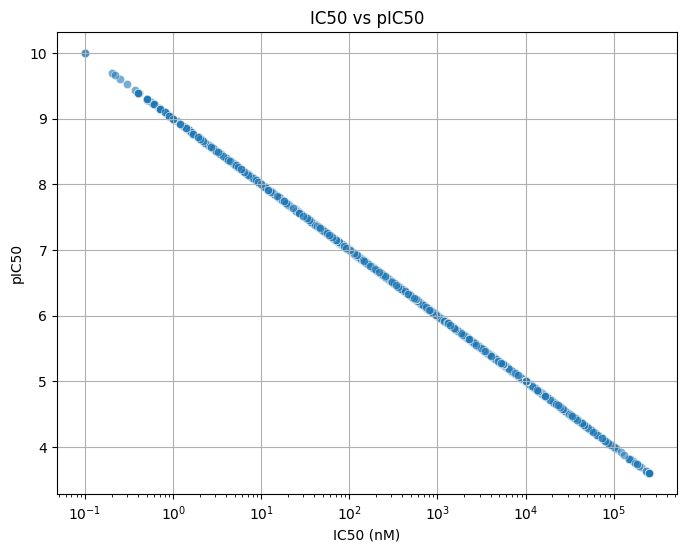

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.scatterplot(x=df["standard_value"], y=df_final["pIC50"], alpha=0.6)
plt.xscale('log')
plt.xlabel("IC50 (nM)")
plt.ylabel("pIC50")
plt.title("IC50 vs pIC50")
plt.grid(True)
plt.show()


## **Alternate method**

In [ ]:
selection_IC50 = ["standard_value"]
selection_pIC50 = ["pIC50"]

selection_IC50 =df[selection_IC50]
selection_pIC50 =df_final[selection_pIC50]

scatterplot_data = pd.concat([selection_IC50, selection_pIC50 ], axis=1)


In [ ]:
scatterplot_data

,standard_value,pIC50
0,155000.0,3.809668
1,1200.0,5.920819
2,10000.0,5.000000
3,1800.0,5.744727
4,200.0,6.698970
...,...,...
2746,2300.0,5.638272
2747,3500.0,5.455932
2748,5300.0,5.275724
2749,1400.0,5.853872


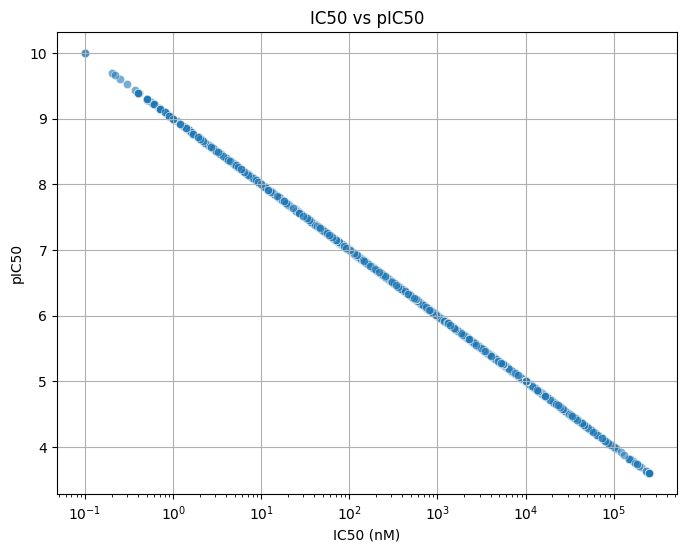

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.scatterplot(x="standard_value", y= "pIC50", data=scatterplot_data, alpha=0.6)
plt.xscale('log')
plt.xlabel("IC50 (nM)")
plt.ylabel("pIC50")
plt.title("IC50 vs pIC50")
plt.grid(True)
plt.show()

## **Removing the intermediate bioactivity class**

### Simple comparison between two bioactivity classes "active" and "inactive"

In [ ]:
df_2class = df_final[df_final.bioactivity_class != "intermediate"]
df_2class

,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL2396992,Cc1[nH]c2cc(Cl)cc(Cl)c2c1CCN,inactive,243.137,3.28432,2.0,1.0,3.809668
2,CHEMBL3218636,CCCC[C@H]1NC(=O)[C@@H](Cc2ccc3ccccc3c2)NC(=O)[...,inactive,1499.798,4.44247,13.0,15.0,5.000000
4,CHEMBL3218638,CC(C)C[C@@H]1NC(=O)[C@H](CCCNC(=N)N)NC(=O)[C@H...,active,1452.703,-1.14759,19.0,17.0,6.698970
5,CHEMBL3218639,CC1(C)COC(=O)[C@H](Cc2ccccc2)NC(=O)[C@H](CCCNC...,inactive,1416.645,1.83787,13.0,16.0,5.000000
6,CHEMBL3218640,CC(C)C[C@@H]1NC(=O)[C@H](CCC(=O)O)NC(=O)[C@H](...,inactive,1276.500,1.45780,10.0,15.0,5.000000
...,...,...,...,...,...,...,...,...
2740,CHEMBL5969767,C=CC(=O)N1CC2(CC(n3nc(-c4ccc5c(cnn5CCO)c4)c(-c...,active,556.070,5.05514,2.0,7.0,7.744727
2741,CHEMBL5853151,C=CC(=O)N1CC2(CC(n3nc(-c4cccnc4C)c(-c4c(Cl)c(C...,active,522.987,6.04574,1.0,5.0,6.270835
2742,CHEMBL5966709,C=CC(=O)N1CC2(CC(n3nc(-c4cccnc4)c(-c4c(Cl)c(Cl...,active,529.378,6.08230,1.0,5.0,6.474955
2744,CHEMBL5285175,C=CC(=O)N1CC2(CC(n3nc(-c4cccnc4)c(-c4c(Cl)c(C)...,active,508.960,5.73732,1.0,5.0,6.093665


In [ ]:
# snaity check
print(df_2class.bioactivity_class.unique())

['inactive' 'active']


## **Copy to Google Drive**

In [ ]:
df_2class.to_csv("Bioactivity_2Classes_Data.csv",index=False)

In [ ]:
# Mount Drive
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [ ]:
# Copying Data to Drive
! cp Bioactivity_2Classes_Data.csv "/content/drive/My Drive/Colab Notebooks/Data"

In [ ]:
# sanity check
! ls -l "/content/drive/My Drive/Colab Notebooks/Data"

total 10114
-rw------- 1 root root  378014 Dec 31 22:16 Bioactivity_2Classes_Data.csv
-rw------- 1 root root  520310 Dec 31 22:15 Bioactivity_3Classes_Data.csv
-rw------- 1 root root 8618041 Dec 30 18:15 bioactivity_data.csv
-rw------- 1 root root  374626 Dec 30 18:23 bioactivity_preprocessed_data.csv
-rw------- 1 root root  464076 Dec 31 04:25 results.zip
